<a href="https://colab.research.google.com/github/seiji0906/machine/blob/main/%E3%82%B9%E3%83%92%E3%82%9A%E3%83%B3%E3%83%86%E3%82%99%E3%83%BC%E3%82%BF%E7%94%BB%E5%83%8F%E7%94%9F%E6%88%90%2B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92L%3D10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
L=10

In [2]:
from numpy.core.fromnumeric import ravel
# データの作成
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
def neighor_spin_sum(s, x, y):
    x_right=x+1
    x_left=x-1
    y_up=y+1
    y_down=y-1

    # 周期境界条件
    if x_right>=Nx:
        x_right-=Nx
    if x_left<0:
        x_left+=Nx
    if y_up>=Ny:
        y_up-=Ny
    if y_down<0:
        y_down+=Ny

    neighor_spin_sum=s[x_right][y]+s[x_left][y]+s[x][y_up]+s[x][y_down]
    return neighor_spin_sum

In [4]:
def calc_energy(s, h=0.01):
    energy = 0
    for x in range(Nx):
        for y in range(Ny):
            # dobule count
            energy += - neighor_spin_sum(s, x, y)/2
    energy += h*np.sum(s)
    return energy

In [5]:
def gibbs_sampling(s, beta=1.0, h=0.0):
    xs=list(range(Nx))
    random.shuffle(xs)
    ys=list(range(Ny))
    random.shuffle(ys)
    for x in xs:
        for y in ys:
            k=neighor_spin_sum(s, x, y)-h
            trans_prob = np.exp(beta*k) / (np.exp(beta*k)+np.exp(-beta*k))
            if np.random.random()<=trans_prob:
                s[x][y]=1
            else:
                s[x][y]=-1
    return s

In [ ]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


folder = r"drive/MyDrive/Colab Notebooks/常磁性L={}".format(L)
if not os.path.exists(folder):
  os.mkdir(folder)

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = L
Ny = L
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
betas=np.linspace(0.1, 0.4, 50).tolist()
# betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L={}/beta={}_step={}.jpg'.format(L, beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/強磁性0125/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/相転移0.4_0.5/beta={}_{}.jpg'.format(beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

In [ ]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

folder = r"drive/MyDrive/Colab Notebooks/強磁性L={}".format(L)
if not os.path.exists(folder):
  os.mkdir(folder)

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = L
Ny = L
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
# betas=np.linspace(0.1, 0.4, 50).tolist()
betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        # filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        filename = '/content/drive/MyDrive/Colab Notebooks/強磁性L={}/beta={}_step={}.jpg'.format(L, beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/相転移0.4_0.5/beta={}_{}.jpg'.format(beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

In [ ]:
# 相転移データ作成
import matplotlib.animation as animation
from matplotlib import rc
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

folder = r"drive/MyDrive/Colab Notebooks/相転移L={}".format(L)
if not os.path.exists(folder):
  os.mkdir(folder)

path = '/content/drive/MyDrive/Colab Notebooks'

Nx = L
Ny = L
steps=100
# 初期配位

# betas=np.linspace(0.005, 0.05, 50).tolist()
# betas=np.linspace(1.0, 2.0,50).tolist()
# betas=np.linspace(0.3, 0.6, 300).tolist()
# betas=np.linspace(0.05, 1.0, 50).tolist()
# betas=np.linspace(0.3, 0.6, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
# betas=np.linspace(0.25, 0.5, 100).tolist()
# betas=np.linspace(0.1, 0.4, 50).tolist()
# betas=np.linspace(0.5, 1.0, 50).tolist()
betas=np.linspace(0.4, 0.5, 50).tolist()

for beta in betas:

  fig, ax = plt.subplots(figsize=(6,6))
  ax.axis("off")

  s = np.random.randint(0, 2, (Nx, Ny)).tolist()

  for i in range(20):

    for step in range(steps):
      s = gibbs_sampling(s, beta=beta, h=0)

      if step>=99:
        im = ax.imshow(s, animated=True)

        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        # filename = '/content/drive/MyDrive/Colab Notebooks/常磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        # filename = '/content/drive/MyDrive/Colab Notebooks/強磁性L=100/beta={}_step={}.jpg'.format(beta, i)
        filename = '/content/drive/MyDrive/Colab Notebooks/相転移L={}/beta={}_step={}.jpg'.format(L, beta, i)

        plt.savefig(filename)
        print(filename)
      
  plt.close()

In [10]:
# # 温度指定

# import matplotlib.animation as animation
# from matplotlib import rc


# Nx = 100
# Ny = 100
# steps=100
# # 初期配位

# fig, ax = plt.subplots(figsize=(6,6))
# ax.axis("off")
# ims = []

# s = np.random.randint(0, 2, (Nx, Ny)).tolist()

# for step in range(steps):
#   s = gibbs_sampling(s, beta=0.1, h=0)
#   if step>=0:
#     im = ax.imshow(s, animated=True)
#     ims.append([im])

#     fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
#     filename = '/content/drive/MyDrive/Colab Notebooks/テスト/beta=0,8_steps={}.jpg'.format(step)
#     # plt.savefig(filename)
#     print(filename)
    

# # ArtistAnimationにfigオブジェクトとimsを代入してアニメーションを作成
# anim = animation.ArtistAnimation(fig, ims)
# # Google Colaboratoryの場合必要
# rc('animation', html='jshtml')
# plt.close()
# anim

In [11]:
# 値設定

maxbeta = 0.5
minbeta = 0.4
folder_name = '相転移L={}'.format(L)
epoch = 10
batch_size = 32
split = 50

In [12]:
import numpy as np
import cv2
import glob as glob
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/Colab Notebooks'


filename1 = '常磁性L={}'.format(L)
filename2 = '強磁性L={}'.format(L)

folder = [filename1, filename2]

X_image = []
Y_label = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)
    Y_label.append(label)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

Y_label = np.array(Y_label)
Y_label = np_utils.to_categorical(Y_label, len(folder))
Y_label[:5]



X_train,X_test,Y_train,Y_test = train_test_split(X_image,Y_label,test_size=0.2, shuffle=True)

print(len(X_train))
print(len(X_test))

1600
400


In [13]:
from tensorflow.python import metrics
from warnings import filters
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 1))

leaky_relu = keras.layers.LeakyReLU(alpha=0.2)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation=leaky_relu)(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss="binary_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [14]:
# 学習データで学習
# model.fit(X_train, Y_train, epochs=10, batch_size=64)
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

#テストデータで精度確認
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

Epoch 1/10
50/50 [==============================] - 107s 2s/step - loss: 0.6951 - accuracy: 0.4944
Epoch 2/10
50/50 [==============================] - 100s 2s/step - loss: 0.6937 - accuracy: 0.5213
Epoch 3/10
50/50 [==============================] - 101s 2s/step - loss: 0.6878 - accuracy: 0.5562
Epoch 4/10
50/50 [==============================] - 108s 2s/step - loss: 0.3954 - accuracy: 0.8400
Epoch 5/10
50/50 [==============================] - 101s 2s/step - loss: 0.3510 - accuracy: 0.8431
Epoch 6/10
50/50 [==============================] - 106s 2s/step - loss: 0.0457 - accuracy: 0.9844
Epoch 7/10
50/50 [==============================] - 101s 2s/step - loss: 0.0326 - accuracy: 0.9881
Epoch 8/10
50/50 [==============================] - 105s 2s/step - loss: 0.0301 - accuracy: 0.9906
Epoch 9/10
50/50 [==============================] - 102s 2s/step - loss: 0.0271 - accuracy: 0.9906
Epoch 10/10
13/13 [==============================] - 7s 552ms/step - loss: 0.0351 - accuracy: 0.9825


In [15]:
path = '/content/drive/MyDrive/Colab Notebooks'


folder = [folder_name]

X_image = []

for label,class_name in enumerate(folder):
  files = glob.glob(path + "/" +  class_name + "/*.jpg")
  for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,dsize=(180,180))
    X_image.append(img)

X_image = np.array(X_image)
X_image = X_image.astype('float32')
X_image /= 255.0

print(len(X_image))

1000


In [16]:
history = model.predict(X_image)

32/32 [==============================] - 18s 560ms/step


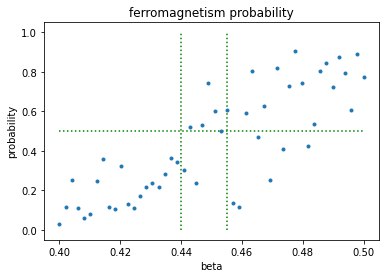

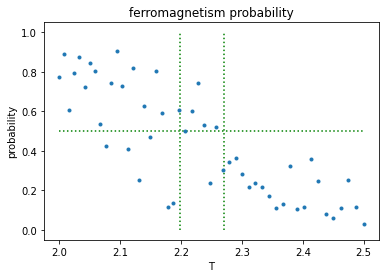

In [19]:
import matplotlib.pyplot as plt
from statistics import mean

# plt.plot(history)

predict = []

for i in range(len(history)):
  predict.append(history[i][1])


result = []

p = 0

for i in range(split):
  for j in range(20):
    p += predict[i*20+j]
  result.append(p / 20)
  p = 0

betas=np.linspace(minbeta, maxbeta, split).tolist()
T = list(map(lambda x: 1/x, betas))

# まずはbetaの値でやってみて、0.44かどうかをみる

tc = 0.455

# beta-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('beta')
plt.ylabel('probability')
plt.hlines(0.5, minbeta, maxbeta, color='g', linestyles='dotted')
plt.vlines(0.44, 0, 1, color='g', linestyles='dotted')
plt.vlines(tc, 0, 1, color='g', linestyles='dotted')
ax.errorbar(betas, result, capsize=4, marker='.', linestyle="")
plt.show()

# T-probability
fig, ax = plt.subplots()
plt.title("ferromagnetism probability")
plt.xlabel('T')
plt.ylabel('probability')
plt.hlines(0.5, 1/maxbeta, 1/minbeta, color='g', linestyles='dotted')
plt.vlines(2.27, 0, 1, color='g', linestyles='dotted')
plt.vlines(1/tc, 0, 1, color='g', linestyles='dotted')
ax.errorbar(T, result, capsize=4, marker='.', linestyle="")
plt.show()

In [18]:
num=19
print(result)

print(result[num])
print(betas[num])
print(T[num])

[0.030571283122545624, 0.11487566424259263, 0.2503121986921215, 0.11003617013972349, 0.062400177277350435, 0.08112572831213356, 0.24524833070390742, 0.35984818015871517, 0.11557809900918414, 0.10526203953770619, 0.32083188847082056, 0.13263713334860086, 0.11281931073751253, 0.17116963900557494, 0.21707291618709518, 0.23800596058867712, 0.21690428944046972, 0.28299732289593604, 0.36632415658534684, 0.34294463503692896, 0.30429045678038164, 0.5198965866642539, 0.2381848907097151, 0.5303628328081913, 0.7424031339585782, 0.6026391972787678, 0.502296829111998, 0.6050914207473397, 0.1337864822580741, 0.11710572970876001, 0.5894135129087317, 0.8046912271529436, 0.4695343295821203, 0.6265462268376722, 0.25356474004606755, 0.8203343492932618, 0.4089205860429502, 0.7282064492814243, 0.9051199300376538, 0.744344362989068, 0.42517848772768047, 0.5333651265556909, 0.8030220890417695, 0.8432857364416122, 0.7247805533239443, 0.8749325519427658, 0.7934743785299361, 0.6083818098064512, 0.88989715623902